
# Financial Sentiment Analysis

<img src="https://png.pngtree.com/background/20210711/original/pngtree-business-finance-hd-background-picture-image_1113083.jpg" alt="Finance Picture">


## Data
The following data is intended for advancing financial sentiment analysis research. It's two datasets (FiQA, Financial PhraseBank) combined into one easy-to-use CSV file. It provides financial sentences with sentiment labels.

## Citations
Malo, Pekka, et al. "Good debt or bad debt: Detecting semantic orientations in economic texts." Journal of the Association for Information Science and Technology 65.4 (2014): 782-796.

## Dataset link:

<ul>
    <li><a href="https://www.kaggle.com/sbhatti/financial-sentiment-analysis" target="_blanck">https://www.kaggle.com/sbhatti/financial-sentiment-analysis</a></li>
</ul>

___

## Building Passive Aggressive Classifier to Prediction

### Importing libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

### Importing the data

In [2]:
df = pd.read_csv('data.csv')
sentiment = df['Sentiment']

In [3]:
df.head()

,Unnamed: 0,Sentence,Sentiment
0,0,The GeoSolutions technology will leverage Bene...,positive
1,1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,2,"For the last quarter of 2010 , Componenta 's n...",positive
3,3,According to the Finnish-Russian Chamber of Co...,neutral
4,4,The Swedish buyout firm has sold its remaining...,neutral


In [4]:
sentiment.head()

0    positive
1    negative
2    positive
3     neutral
4     neutral
Name: Sentiment, dtype: object

### Data Preprocessing

In [5]:
sentiment.value_counts()

neutral     3130
positive    1852
negative     860
Name: Sentiment, dtype: int64

In [6]:
df.shape

(5842, 3)

In [7]:
print("Number of NaN values: {}.".format(df.isnull().sum().sum()))

Number of NaN values: 0.


In [8]:
print("Number of duplicated rows: {}.".format(df.duplicated().sum()))

Number of duplicated rows: 0.


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5842 non-null   int64 
 1   Sentence    5842 non-null   object
 2   Sentiment   5842 non-null   object
dtypes: int64(1), object(2)
memory usage: 137.0+ KB


In [10]:
print('Number of NaN numbers: \n{}'.format(df.isnull().sum()))

Number of NaN numbers: 
Unnamed: 0    0
Sentence      0
Sentiment     0
dtype: int64


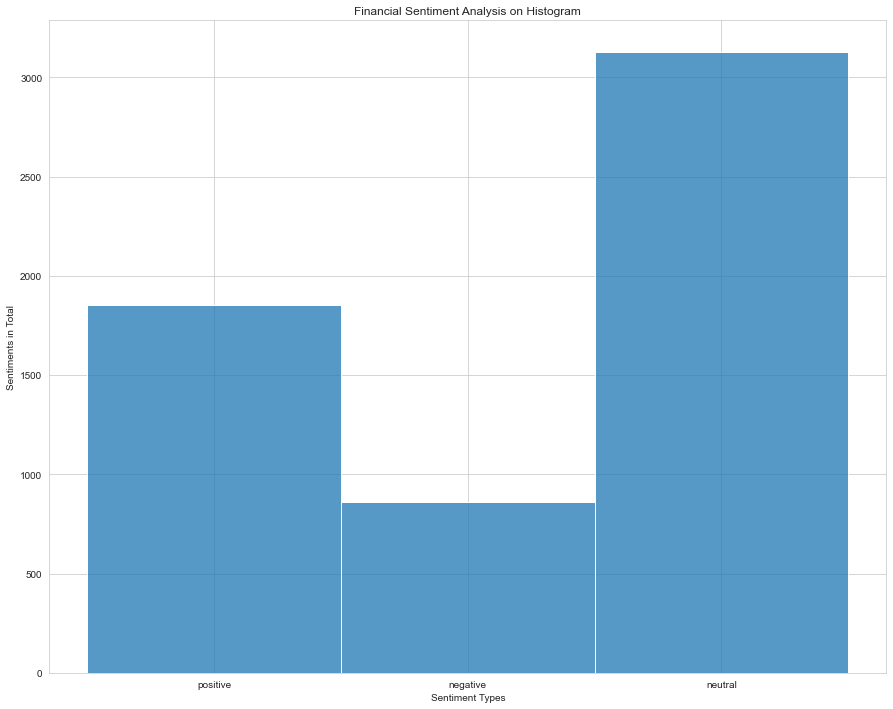

In [11]:
plt.figure(figsize = (15, 12))
sns.set_style('whitegrid')    
sns.histplot(data=sentiment)
plt.title("Financial Sentiment Analysis on Histogram")
plt.xlabel("Sentiment Types")
plt.ylabel("Sentiments in Total")
plt.show()

### Train - Test Split

In [12]:
x_train, x_test, y_train, y_test=train_test_split(df['Sentence'], sentiment, test_size=0.2, random_state=7)

### Initialize a TfidfVectorizer

In [13]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

### Fit and transform train set, transform test set

In [14]:
tfidf_train = tfidf_vectorizer.fit_transform(x_train) 
tfidf_test = tfidf_vectorizer.transform(x_test)

### Initialize a PassiveAggressiveClassifier

The passive-aggressive algorithms are a family of algorithms for large-scale learning. They are similar to the Perceptron in that they do not require a learning rate.

In [15]:
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

### Predict on the test set and calculate accuracy

In [16]:
y_pred = pac.predict(tfidf_test)
score = accuracy_score(y_test, y_pred)
print(f'Accuracy score: {score}')

Accuracy score: 0.6201881950384944


### Confusion matrix of model

In [17]:
cm = confusion_matrix(y_test, y_pred, labels=['positive', 'negative', 'neutral'])
print("\nConfusion Matrix (PassiveAggressiveClassifier):\n", cm)


Confusion Matrix (PassiveAggressiveClassifier):
 [[249  22  86]
 [ 38  37 105]
 [ 80 113 439]]


### Prediction

In [18]:
pred = ["Viking Line has canceled some services."]
my_pred = tfidf_vectorizer.transform(pred)

my_predClass = pac.predict(my_pred)
print(f"Model predicted your sentiment as {my_predClass[0]}.")

Model predicted your sentiment as negative.


### Save PAC model via Pickle

In [19]:
import pickle

pickle_file = open('pac.pkl', 'ab')
pickle.dump(pac, pickle_file)                     
pickle_file.close()

___

## Building XGBoost Classifier to Prediction

### Importing XGBoost Library

In [20]:
from xgboost import XGBClassifier

### Fit and train the model

In [21]:
classifier= XGBClassifier()
classifier.fit(tfidf_train, y_train)

[02:17:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [22]:
y_pred = classifier.predict(tfidf_test)

### Building confusion matrix

In [23]:
cm2 = confusion_matrix(y_pred, y_test)  #  Comparing results
print("\nConfusion Matrix(XGBoost):\n", cm2)


Confusion Matrix(XGBoost):
 [[ 26  58  13]
 [125 544 131]
 [ 29  30 213]]


In [24]:
print(f"\nAccuracy score (XGBoost): {accuracy_score(y_test, y_pred)}")


Accuracy score (XGBoost): 0.669803250641574


### Prediction

In [25]:
xgb_sentiment = ["Viking Line has canceled some services."]
xgb_sentiment_trans = tfidf_vectorizer.transform(xgb_sentiment)
xgb_pred = classifier.predict(xgb_sentiment_trans)

print(f"Model predicted your sentiment as {xgb_pred[0]}.")

Model predicted your sentiment as neutral.


### Save XGBoost model via Pickle

In [26]:
import pickle

pickle_file = open('xgboost.pkl', 'ab')
pickle.dump(classifier, pickle_file)                     
pickle_file.close()

___

## Logistic Regression to Predict

### Importing library

In [27]:
from sklearn.linear_model import LogisticRegression

### Fit logistic regression

In [28]:
logr = LogisticRegression(random_state=0)
logr.fit(tfidf_train, y_train)

LogisticRegression(random_state=0)

### Predict

In [29]:
y_pred = logr.predict(tfidf_train)
y_pred

array(['neutral', 'neutral', 'positive', ..., 'neutral', 'negative',
       'positive'], dtype=object)

In [30]:
pred_logr = ["Viking Line has canceled some services."]
my_pred_logr = tfidf_vectorizer.transform(pred_logr)

my_predClass_logr = logr.predict(my_pred_logr)
print(f"Model predicted your sentiment as {my_predClass_logr[0]}.")

Model predicted your sentiment as neutral.


### Save XGBoost Model model via Pickle

In [31]:
pickle_file = open('logr.pkl', 'ab')
pickle.dump(logr, pickle_file)                     
pickle_file.close()